<a href="https://colab.research.google.com/github/engineereliab076/engineereliab076/blob/main/MNIST_HAND_CLASSIFICATIONWRITTEN_DIGIT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

importing the dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix

DATA COLLECTION

In [2]:
#importing the mnist data from keras.dataset

(x_train,y_train),(x_test,y_test) = mnist.load_data()

In [3]:
#check the shapes of numpy arrays
print(x_train.shape,y_train.shape,x_test.shape, y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


we have
training data 60000
test data 10000

dimension 28x28

GRAYSCALE images

In [4]:
#print the 10 image
print(x_train[10])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  42 118 219 166 118 118   6
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 103 242 254 254 254 254 254  66
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  18 232 254 254 254 254 254 238
   70   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 104 244 254 224 254 254 254
  141   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 207 254 210 25

In [5]:
x_train[10].shape

(28, 28)

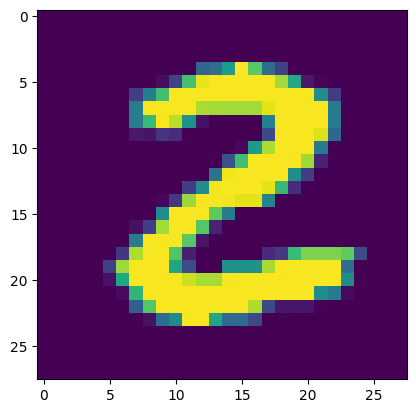

2


In [6]:
#displaying the image
plt.imshow(x_train[25])
plt.show()

#print the corresponding label
print(y_train[25])


image labels

In [7]:
print(y_train.shape, y_test.shape)

(60000,) (10000,)


In [8]:
#print the unique values
print(np.unique(y_train))
print(np.unique(y_test))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


We can use these labels as they are or we can apply one hot encoding

In this dataset, all the images have same dimension.If they could have different dimensions we could resize them to the common dimension.

In [9]:
#scaling the values
x_train = x_train/255
x_test = x_test/255

by scaling the data, the minimum value is 0 and max is 1 255/255=1 and 0/255=0 , all the other values are in btn 0 and 1

In [10]:
#print the 10 image
print(x_train[10])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

BUILDING THE NEURAL NETWORK

In [11]:
#SETTING UP THE LAYERS

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(50,activation='relu'),
    keras.layers.Dense(50,activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])

In [12]:
#COMPILING THE NN
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [13]:
#training the NN model
model.fit(x_train,y_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.3016 - accuracy: 0.9120
Epoch 2/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.1459 - accuracy: 0.9559
Epoch 3/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.1073 - accuracy: 0.9674
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0868 - accuracy: 0.9733
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0708 - accuracy: 0.9780
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0600 - accuracy: 0.9811
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0528 - accuracy: 0.9830
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0451 - accuracy: 0.9859
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0397 - accuracy: 0.9868
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.

Accuracy on test data

In [14]:
loss,accuracy=model.evaluate(x_test,y_test)
print(accuracy)

313/313 [==============================] - 1s 2ms/step - loss: 0.1043 - accuracy: 0.9739
0.9739000201225281


<function matplotlib.pyplot.show(close=None, block=None)>

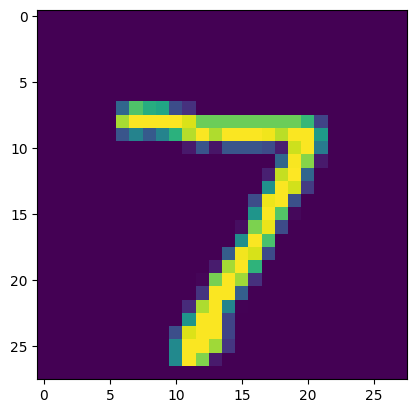

In [15]:
#print first data point in x_test
plt.imshow(x_test[0])
plt.show

In [16]:
print(y_test[0])

7


In [17]:
y_pred = model.predict(x_test)

313/313 [==============================] - 1s 2ms/step


In [18]:
y_pred.shape

(10000, 10)

In [19]:
print(y_pred[0])

[2.4494619e-04 2.7303617e-02 4.1231021e-01 8.8262051e-01 6.6637137e-04
 1.0529435e-04 2.6117233e-08 9.9999857e-01 2.8087565e-01 7.0617783e-01]


In [20]:
#model.predict gives the prediction probability of each class of that particular data point

In [21]:
#convertion the pred probability to class labels
y_pred_labels = [np.argmax(i) for i in y_pred]
print(y_pred_labels)

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 3, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 9, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 9, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 4, 9, 8, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 8, 0, 3, 1, 6, 4, 3, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 5, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 9, 8, 7, 2, 3, 0, 2, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 6, 8, 5, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 3, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 4, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 2, 5, 9, 7, 9, 3, 4, 4, 2, 0, 7, 1, 1, 2, 1, 

In [22]:
print(y_pred_labels[9999])

6


y test---true labels
y pred----predicted labels

CONFUSION MATRIX

In [23]:
conf_mat = confusion_matrix(y_test,y_pred_labels)

In [24]:
print(conf_mat)

tf.Tensor(
[[ 959    0    0    2    3    5    5    2    3    1]
 [   0 1127    1    1    0    1    1    0    4    0]
 [   2    2  998    9    6    1    2    4    8    0]
 [   0    0    4  995    0    1    0    4    5    1]
 [   0    0    2    2  965    1    6    0    1    5]
 [   1    0    0   18    1  858    8    1    4    1]
 [   3    2    0    1    5    6  936    0    5    0]
 [   1    6    9    3    4    2    0  992    4    7]
 [   1    0    1    7    5    5    2    3  947    3]
 [   3    2    0    6   21    2    0    7    5  963]], shape=(10, 10), dtype=int32)


Text(0.5, 47.7222222222222, 'PREDICTED LABELS')

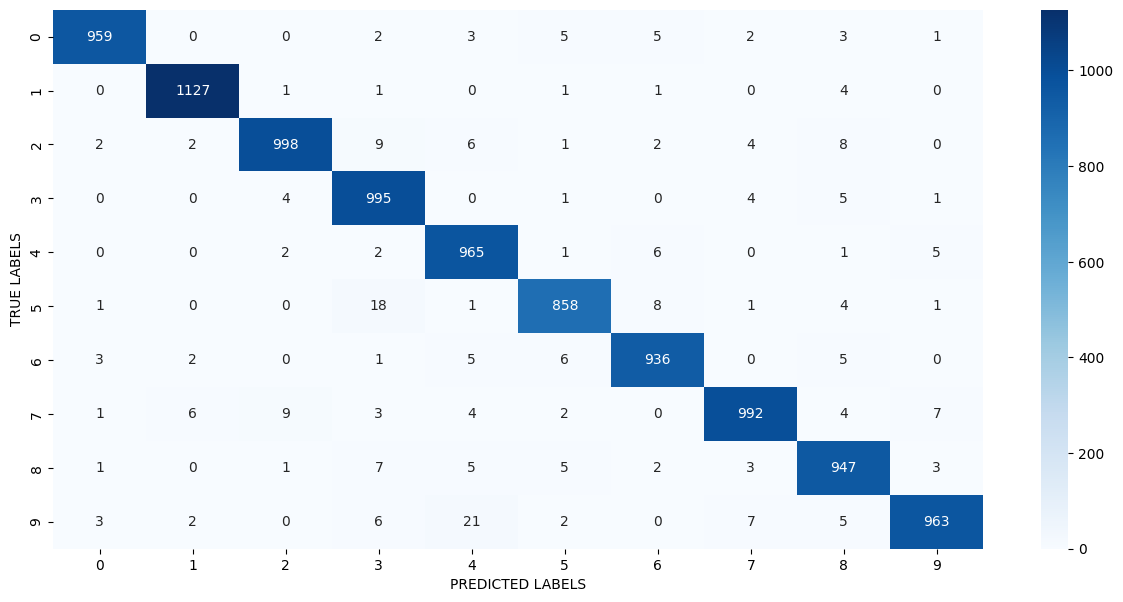

In [25]:
plt.figure(figsize=(15,7))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.ylabel('TRUE LABELS')
plt.xlabel('PREDICTED LABELS')

BUILDING THE PREDICTIVE SYSTEM

In [26]:
input_image_path = '/content/MNIST_digit.png'

input_img = cv2.imread(input_image_path)

In [27]:
type(input_img)

numpy.ndarray

In [28]:
print(input_img)

[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]


In [29]:
input_img.shape

(318, 318, 3)

In [30]:
grayscale = cv2.cvtColor(input_img,cv2.COLOR_RGB2GRAY)

In [31]:
grayscale.shape

(318, 318)

In [32]:
input_img_resize = cv2.resize(grayscale,(28,28))

In [33]:
input_img_resize.shape

(28, 28)

In [34]:
cv2_imshow(input_img_resize)

In [35]:
input_img_resize = input_img_resize/255

In [36]:
image_reshaped = np.reshape(input_img_resize,[1,28,28])

In [37]:
input_pred = model.predict(image_reshaped)

1/1 [==============================] - 0s 23ms/step


In [38]:
print(input_pred)

[[1.32241047e-13 1.12827496e-04 6.87570730e-03 1.00000000e+00
  6.99285699e-11 1.90040991e-01 2.25754965e-14 6.90290619e-07
  1.04486085e-01 7.39189923e-01]]


In [39]:
input_pred_label = np.argmax(input_pred)

In [40]:
print(input_pred_label)

3


BUILDING A PREDICTIVE SYSTEM

path of the image to be predicted:/content/MNIST_digit.png


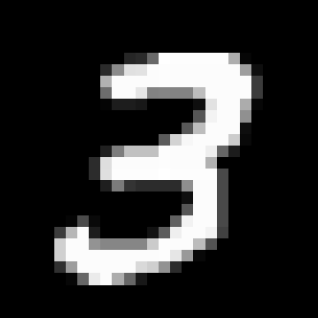

1/1 [==============================] - 0s 38ms/step
The handwritten image is recognized by 3


In [51]:
input_image_path = input('path of the image to be predicted:')

input_img = cv2.imread(input_image_path)

cv2_imshow(input_img)

grayscale = cv2.cvtColor(input_img,cv2.COLOR_RGB2GRAY)

input_img_resize = cv2.resize(grayscale,(28,28))

input_img_resize = input_img_resize/255

image_reshaped = np.reshape(input_img_resize,[1,28,28])

input_pred = model.predict(image_reshaped)

input_pred_label = np.argmax(input_pred)

print('The handwritten image is recognized by',input_pred_label)